In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
file_path = 'data.csv'  
data = pd.read_csv(file_path)

In [2]:
# 1. Data info and summary statistics
data_info = data.info()
data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

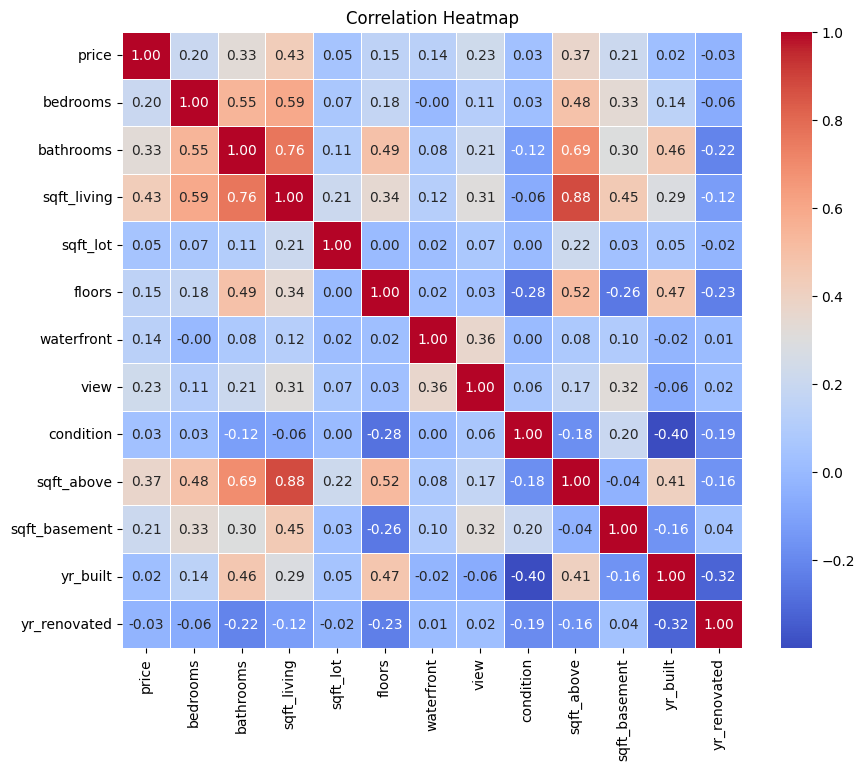

In [3]:
# 2. Visualizing the correlation between features (hanya untuk kolom numerik)
# Menghapus kolom non-numerik
numeric_data = data.select_dtypes(include=[np.number])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [4]:
# 3. Checking for missing values
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100
print(f"Missing values percentage:\n{missing_values_percentage}")

Missing values percentage:
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64


In [5]:
# 4. Data Preprocessing: Split the data and scale it
# Defining features (X) and target (y)
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
          'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 
          'yr_built', 'yr_renovated']]
y = data['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 5. Building and training the ANN model
# Building the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
model.add(Dense(units=32, activation='relu'))  # Hidden layer
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 456152547328.0000 - val_loss: 1356721684480.0000
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 424050524160.0000 - val_loss: 1356590350336.0000
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 426835542016.0000 - val_loss: 1356146278400.0000
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 429207814144.0000 - val_loss: 1355229822976.0000
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 431447080960.0000 - val_loss: 1353682518016.0000
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 410408288256.0000 - val_loss: 1351394525184.0000
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 411152973824.0000 - val_loss: 1348331110400.0000
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 444652912640.0000 - val_loss: 1344279281664.0000
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 418880978944.0000 - val_loss: 1339389116416.0000
Epoch 10/100
115/115 ━

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 207925264384.0000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


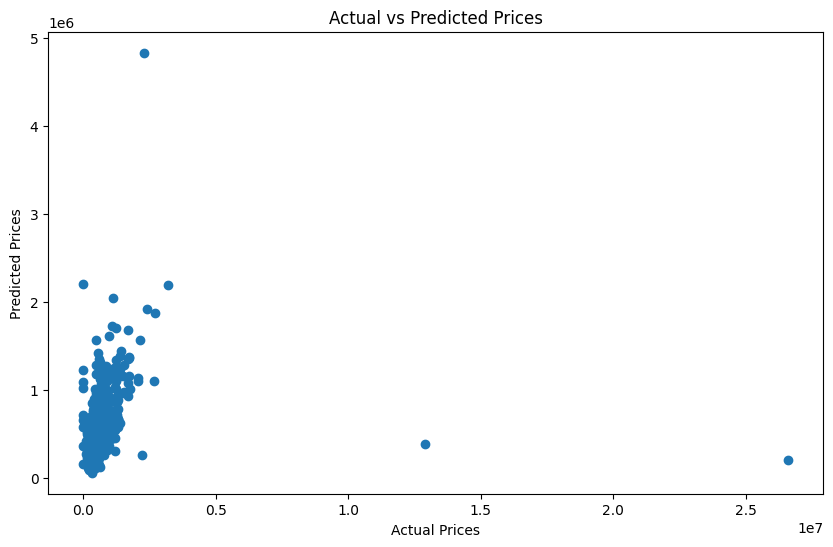

Test Loss (Mean Squared Error): 1010031656960.0


In [7]:
# 6. Evaluating the model
test_loss = model.evaluate(X_test_scaled, y_test)

# Predicted vs actual price
y_pred = model.predict(X_test_scaled)

# Plotting Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Print the test loss (Mean Squared Error)
print(f"Test Loss (Mean Squared Error): {test_loss}")

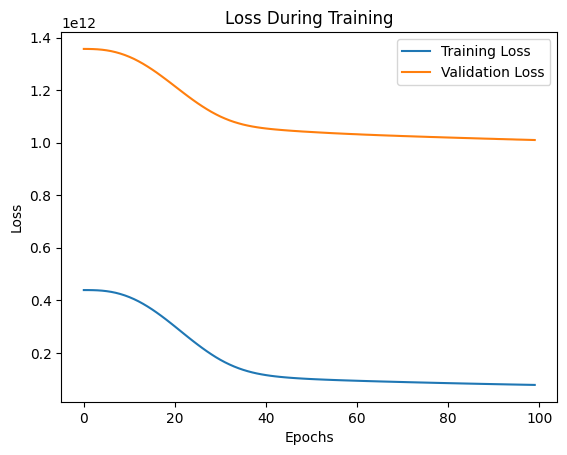

In [8]:
# 7. Visualize the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.show()

In [ ]:
# 8. Meminta input spesifikasi rumah dari pengguna dan konversi harga dari USD ke IDR
# Nilai tukar USD ke IDR 
usd_to_idr = 16.247  # 1 USD = 16,247 IDR

# Meminta input spesifikasi rumah dari pengguna
print("Masukkan informasi rumah:")
bedrooms = int(input("Jumlah kamar tidur: "))
bathrooms = float(input("Jumlah kamar mandi: "))
sqft_living = int(input("Ukuran rumah (sqft living): "))
sqft_lot = int(input("Ukuran lot (sqft lot): "))
floors = float(input("Jumlah lantai: "))
waterfront = int(input("Apakah rumah berada di dekat tepi laut? (1 untuk ya, 0 untuk tidak): "))
view = int(input("Skor view (0-4): "))
condition = int(input("Kondisi rumah (1-5): "))
sqft_above = int(input("Ukuran rumah di atas tanah (sqft above): "))
sqft_basement = int(input("Ukuran ruang bawah tanah (sqft basement): "))
yr_built = int(input("Tahun dibangun: "))
yr_renovated = int(input("Tahun renovasi (0 jika tidak ada): "))

# Mengubah input menjadi array
input_data = np.array([[bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view,
                        condition, sqft_above, sqft_basement, yr_built, yr_renovated]])

# Menstandarkan input sesuai dengan standar yang digunakan pada data pelatihan
input_data_scaled = scaler.transform(input_data)

# Menggunakan model untuk memprediksi harga rumah
predicted_price_usd = model.predict(input_data_scaled)

# Mengonversi harga dari USD ke IDR
predicted_price_idr = predicted_price_usd[0][0] * usd_to_idr

# Menampilkan hasil prediksi dalam USD dan IDR
print(f"\nHarga rumah yang diprediksi: ${predicted_price_usd[0][0]:,.2f}")
print(f"Harga rumah yang diprediksi dalam Rupiah: Rp {predicted_price_idr:,.2f}")

Masukkan informasi rumah:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Harga rumah yang diprediksi: $145,286.78
Harga rumah yang diprediksi dalam Rupiah: Rp 2,179,301,632.00


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
